<a href="https://colab.research.google.com/github/satishgunjal/Machine_Learning_Tutorials/blob/master/05_Logistic_Regression/Logistic_Regression_From_Scratch_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logistic_regression_header.png)](https://raw.githubusercontent.com/satishgunjal/images/master/logistic_regression_header.png)

This tutorial covers basic concepts of logistic regression. I will explain the process of creating a model right from hypothesis function to algorithm. We will also use plots for better visualization of inner workings of the model. At the end we will test our model for binary classification.

# Introduction
 
Unlike Linear Regression, Logistic Regression is used to solve classification problem like classifying email as spam or not spam. Don't get confuse by the name 'Regression', Logistic Regression is a 'Classification Algorithm'. 
If the value that we are trying to classify takes on only two values 0(negative/false) or 1 (positive/true) then we call it 'Binary Classification' and if there are more than two classes, then we call it 'Multi Class Classification'
 
![Binary_vs_Multiclass_Classification.png](https://raw.githubusercontent.com/satishgunjal/images/master/Binary_vs_Multiclass_Classification.png)
 
We will create our own Logistic regression algorithm and  build a classification model that estimates an applicant's probability of admission based on Exam 1 and Exam 2 scores. 
 
Logistic Regression is Supervised Learning Algorithm.
 
I am using same notation and example data used in [Andrew Ng's Machine Learning course](https://www.coursera.org/learn/machine-learning/home/welcome)
 
 
 
 



## Why Can't We use Linear Regression For Classification
* We have already learned about Linear Regression, so you must be wondering why do we need Logistic Regression? Can't we use Linear Regression to solve the classification problems?
* Remember that Linear Regression works well when there is linear relation between output and input values
* In classification our objective is to get discrete value like 0 or 1. But in case of Linear regression our objective is to get continuous value which can range outside 0 and 1. This is one of the problem, as we are trying to classify output as 0 or 1 but Linear Regression algorithm isn't designed for predicting discrete values.
* So in order to get discrete output from Linear Regression we can use threshold value(0.5) to classify output. Classify anything above 0.5 as positive class(1) and anything below 0.5 as negative class(0). 
 
  ![Classification_Using_Linear_Regression.png](https://raw.githubusercontent.com/satishgunjal/images/master/Classification_Using_Linear_Regression.png)
 
* But this adjustment also do not work if there are outliers in dataset. Notice the slope of line in below figure and incorrect prediction.
 
  ![Classification_Using_Linear_Regression_Issue.png](https://raw.githubusercontent.com/satishgunjal/images/master/Classification_Using_Linear_Regression_Issue.png)
 
* That's why we can't use Linear Regression to solve classification problem, and we need dedicated algorithm for it.
 
## Hypothesis Function
* Since our objective is to get discrete value(0 or 1) we will create a hypothesis function that will return values between 0 and 1
* Sigmoid function do exactly that, it maps the whole real number range between 0 and 1. It is also called as Logistic function. 
 
  ![sigmoid_function.png](https://raw.githubusercontent.com/satishgunjal/images/master/sigmoid_function.png)
 
* The term Sigmoid means 'S-shaped' and when plotted this function gives S-shaped curve. In below figure for given range of X values, Y values ranges from 0 to 1 only
 
  ![sigmoid_function_curve.png](https://raw.githubusercontent.com/satishgunjal/images/master/sigmoid_function_curve.png)
 
* Remember hypothesis function for Linear Regression is 
    ```
    h(x) = θ_0 + (θ_1*x_1)....(θ_n*x_n)
    ```
  We are going to use this function as input to our Sigmoid function to get the discrete values.
    ```
    z = θ_0 + (θ_1*x_1)....(θ_n*x_n)
    ```
 
* Hypothesis function for Logistic Regression is 
    ```
    h(x) = g(z) = g(θ_0 + (θ_1*x_1)....(θ_n*x_n))
    ```
    ![logistic_hypothesis_function.png](https://raw.githubusercontent.com/satishgunjal/images/master/logistic_hypothesis_function.png)
 
  
* Basically we are using line function as input to sigmoid function in order to get discrete value from 0 to 1. The way our sigmoid function g(z) behaves is that, when its input is greater than or equal to zero, its output is greater than or equal to 0.5
 
  ![logistic_function_input_relation.png](https://raw.githubusercontent.com/satishgunjal/images/master/logistic_function_input_relation.png)
 
* Since positive input results in positive class and negative input results in negative class, we can separate both the classes by setting the weighted sum of inputs to 0. i.e. 
 
    ```
    z = θ_0 + (θ_1*x_1)....(θ_n*x_n) = 0
    ```
 
## Decision Boundary
* Decision boundary separates the positive and negative class
* The decision boundary is the line that separates the area where y = 0 and where y = 1. It is created by our hypothesis function.
* As explained earlier decision boundary can be found by setting the weighted sum of inputs to 0
* Lets create a formula to find decision boundary for two feature(x and x1) dataset
 
    ```
    h(x) = θ_0 + (θ_1*x_1) + (θ_2*x_2) = 0
    x_2 = -(θ_0 + (θ_1*x_1)) / θ_2
    ```
 
  ![Decision_Boundary.png](https://raw.githubusercontent.com/satishgunjal/images/master/Decision_Boundary.png)
 
Now we have our hypothesis function and decision boundary formula to classify the given data. Just like linear regression lets define a cost function to find the optimum values of theta parameters.
 
## Cost Function
 
It is obvious that to find the optimum values of theta parameters we have to try multiple values and then choose the best possible values based on how the predicted class match with given data. To do this we will create a cost function (J). Inner working of cost function is as below
 
* We will start with random values of θ_0 and θ_1
* We will execute the hypothesis function using theta values, to get the predicted values(0 or 1) for every training example
* Now we will compare our predicted discrete values with actual target values from training data.
* If our predicted value matches with actual value then our cost will be '0' or else cost will be highly penalized.
* Logistic Regression cost function is as below
 
  ![logistic_regression_cost_function.png](https://raw.githubusercontent.com/satishgunjal/images/master/logistic_regression_cost_function.png)
 
* Vectorized implementation Of Logistic Regression cost function is as below
 
  ![logistic_regression_cost_function_vectorized.png](https://raw.githubusercontent.com/satishgunjal/images/master/logistic_regression_cost_function_vectorized.png)
 
* Just like linear regression logistic cost function is also ‘Convex function’
* So the optimum values of the theta are the one, for which we get minimum value of the cost.
 
Now we are going to use 'Advanced Optimization Algorithm' to find theta values.
 
## Advance Optimization Algorithm
* We are going to use fmin_tnc() function from 'scipy' library to find theta values
* This function will use cost function and gradient of the cost to find the optimum values of theta.
* Gradient of the cost is nothing but partial derivative of cost function
 
  ![gradient_of_cost.png](https://raw.githubusercontent.com/satishgunjal/images/master/gradient_of_cost.png)
 
* Note that while this gradient of cost looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of h(x).




Enough of theory, now lets implement logistic regression algorithm using Python and create our classification model

# Python Code
Now we will implement the Logistic regression algorithm in Python and build a classification model that estimates an applicant's probability of admission based on Exam 1 and Exam 2 scores.
 



## Notations used
* m   = no of training examples (no of rows of feature matrix)
* n   = no of features (no of columns of feature matrix)
* X's = input variables / independent variables / features
* y's = output variables / dependent variables / target/ labels

## Import Libraries
* pandas: Used for data manipulation and analysis
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* matplotlib : It's plotting library, and we are going to use it for data visualization
* scipy.optimize: Advance optimization library

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Load The Data
* We are going to use 'admission_basedon_exam_scores.csv' CSV file
* File contains three columns 	Exam 1 marks,	Exam 2 marks and	Admission status

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')
m, n = df.shape
print('Number of training examples m = ', m)
print('Number of features n = ', n - 1) # Not counting the 'Label: Admission status'
df.sample(5) # Show random 5 training examples

Number of training examples m =  100
Number of features n =  2


,Exam 1 marks,Exam 2 marks,Admission status
38,74.789253,41.573415,0
45,62.222676,52.060992,0
19,76.978784,47.575964,1
3,60.182599,86.308552,1
66,40.457551,97.535185,1


## Data Understanding
* There are total 100 training examples (m= 100 or 100 no of rows)
* There are two features Exam 1 marks and Exam 2 marks
* Label column contains application status. Where '1' means admitted and '0' means not admitted
* Total no of features (n) = 2 (Later we will add column of ones(x_0) to make it 3)
 



## Data Visualization

To plot the data of admitted and not admitted applicants, we need to first create separate data frame for each class(admitted/not-admitted)


In [7]:
df_admitted = df[df['Admission status'] == 1]
print('Dimension of df_admitted= ', df_admitted.shape)
df_admitted.sample(5)

Dimension of df_admitted=  (60, 3)


,Exam 1 marks,Exam 2 marks,Admission status
81,94.834507,45.694307,1
46,77.193035,70.458200,1
88,78.635424,96.647427,1
6,61.106665,96.511426,1
4,79.032736,75.344376,1


In [8]:
df_notadmitted = df[df['Admission status'] == 0]
print('Dimension of df_notadmitted= ', df_notadmitted.shape)
df_notadmitted.sample(5)

Dimension of df_notadmitted=  (40, 3)


,Exam 1 marks,Exam 2 marks,Admission status
22,50.534788,48.855812,0
65,66.560894,41.092098,0
63,30.058822,49.592974,0
43,82.368754,40.618255,0
39,34.183640,75.237720,0


Now lets plot the scatter plot for admitted and not admitted students

Text(0.5, 1.0, 'Admitted Vs Not Admitted Applicants')

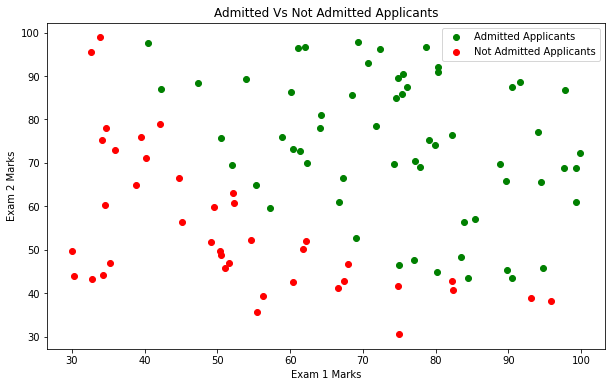

In [9]:
plt.figure(figsize = (10,6))
plt.scatter(df_admitted['Exam 1 marks'], df_admitted['Exam 2 marks'], color='green', label='Admitted Applicants')
plt.scatter(df_notadmitted['Exam 1 marks'], df_notadmitted['Exam 2 marks'], color='red', label='Not Admitted Applicants')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')
plt.legend()
plt.title('Admitted Vs Not Admitted Applicants')

## Compute Cost Using Cost Function

### Create Feature Matrix X and Label Vector y
If you want to know the reason behind adding column of ones to feature matrix, please refer 'Vector Representation Of Hypothesis Function' in [Univariate Linear Regression](https://satishgunjal.github.io/univariate_lr/)
 



In [10]:
# Get feature columns from dataframe
X = df.iloc[:, 0:2] 
#Add column of ones (intercept term)
X = np.hstack((np.ones((m,1)),X))
# Now X is numpy array of 2 dimension
print("Dimension of feature matric X = ", X.shape, '\n')

y = df.iloc[:, -1]
# First 5 records training examples with labels
for i in range(5):
    print('x =', X[i, ], ', y =', y[i])

Dimension of feature matric X =  (100, 3) 

x = [ 1.         34.62365962 78.02469282] , y = 0
x = [ 1.         30.28671077 43.89499752] , y = 0
x = [ 1.         35.84740877 72.90219803] , y = 0
x = [ 1.         60.18259939 86.3085521 ] , y = 1
x = [ 1.         79.03273605 75.34437644] , y = 1


Lets also initialize the theta values with 0

In [11]:
theta = np.zeros(n)
theta

array([0., 0., 0.])

### Create Sigmoid Function

In [0]:
def sigmoid(z):
    """
    To convert continuous value into a range of 0 to 1

    I/P
    ----------
    z : Continuous value

    O/P
    -------
    Value in range between 0 to 1.
    """
    g = 1 / (1 + np.exp(-z))
    return g

### Create Cost And Gradient Function
We are using vector implementation of cost and gradient function formula's for better performance



In [0]:
def cost_function(theta, X, y):
    """
    Compute cost for logistic regression.

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(1 x m)

    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    J : The cost of using theta as the parameter for linear regression to fit the data points in X and y.
    """
    m, n = X.shape
    x_dot_theta = X.dot(theta)

    J = 1.0 / m * (-y.T.dot(np.log(sigmoid(x_dot_theta))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_theta))))

    return J

In [0]:
def gradient(theta, X, y):
    """
    Compute gradient for logistic regression.

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(1 x m)

    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    grad: (numpy array)The gradient of the cost with respect to the parameters theta
    """
    m, n = X.shape
    x_dot_theta = X.dot(theta)

    grad = 1.0 / m * (sigmoid(x_dot_theta) - y).T.dot(X)

    return grad

Testing the cost_function() using initial values

In [15]:
cost = cost_function(theta, X, y)
print ('Cost at initial theta (zeros):', cost)

grad = gradient(theta, X, y)
print ('Gradient at initial theta (zeros):', grad)

Cost at initial theta (zeros): 0.6931471805599453
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]


## Using Advance Optimization Technique To Find Theta Values
* Remember in [Univariate Linear Regression](https://satishgunjal.github.io/univariate_lr/) tutorial we have created a gradient descent function to find the theta values.
* But here we are going use fmin_tnc function from the scipy library
* This process is same as using 'fit' method from sklearn library. Because here we are trying to optimize our cost function in order to find the best possible parameter(theta) values
* fmin_tnc function takes four arguments:
  - func: Cost function to minimize
  - fprime: Gradient for the function defined by ‘func’
  - x0: initial values for the parameters(theta) that we want to find
  - args: feature and label values



In [16]:
theta, nfeval, rc = opt.fmin_tnc(func=cost_function, fprime= gradient, x0=theta, args=(X, y))

cost = cost_function(theta, X, y)
print ('Cost at theta found by fminunc:', cost)
print ('theta:', theta)

Cost at theta found by fminunc: 0.20349770158947436
theta: [-25.16131865   0.20623159   0.20147149]


## Visualization
Let's plot decision boundary to cross-check the accuracy of our model



Text(0.5, 1.0, 'Decision Boundary')

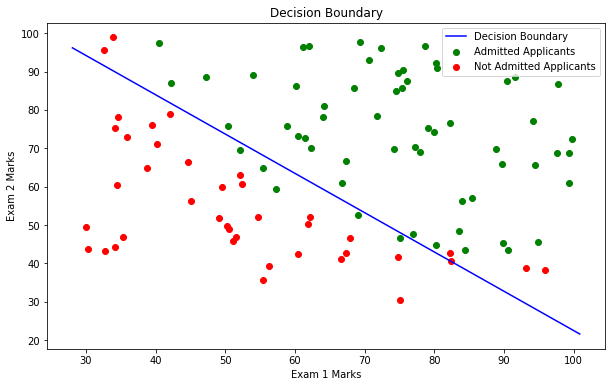

In [17]:
# Lets calculate the X and Y values using Decision Boundary formula
x_values = [np.min(X[:, 1] -2), np.max(X[:, 2] + 2)]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]

plt.figure(figsize = (10,6))
plt.scatter(df_admitted['Exam 1 marks'], df_admitted['Exam 2 marks'], color='green', label='Admitted Applicants')
plt.scatter(df_notadmitted['Exam 1 marks'], df_notadmitted['Exam 2 marks'], color='red', label='Not Admitted Applicants')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')

plt.plot(x_values, y_values, color='blue', label='Decision Boundary')
plt.legend()
plt.title('Decision Boundary')

## Model Testing
* **Question: Predict an admission probability for applicant with scores 45 in Exam 1 and 85 in Exam 2**
* We can use our hypothesis function for prediction
  h(x) = g(z) = g(Xθ)



In [18]:
input_data = np.array([1, 45, 85]) # Note the intercept term '1' in array
prob = sigmoid(np.dot(input_data, theta))
print ('Admission probability for applicant with scores 45 in Exam 1 and 85 in Exam 2 is =', prob)

Admission probability for applicant with scores 45 in Exam 1 and 85 in Exam 2 is = 0.7762906229081791


Let's create a function for prediction on our logistic model. Instead of predicting the probability between 0 and 1, this function will use threshold value of 0.5 to predict the discrete value. 1 when probability >= 0.5 else 0
 



In [0]:
def predict(theta, X):
    """
    Predict the class between 0 and 1 using learned logistic regression parameters theta.
    Using threshold value 0.5 to convert probability value to class value 

    I/P
    ----------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
        m= number of training examples
        n= number of features (including X_0 column of ones)

    theta : 1D array of fitting parameters or weights. Dimension (1 x n)

    O/P
    -------
    Class type based on threshold
    """
    p = sigmoid(X.dot(theta)) >= 0.5
    return p.astype(int)

### Accuracy Of Model

In [20]:
predictedValue = pd.DataFrame(predict(theta, X), columns=['Predicted Admission status']) # Create new dataframe of column'Predicted Price'
actualAdmissionStatus = pd.DataFrame(y, columns=['Admission status'])
df_actual_vs_predicted = pd.concat([actualAdmissionStatus,predictedValue],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
Admission status,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1
Predicted Admission status,0,0,0,1,1,0,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,1,1,1,0,1


In [21]:
p = predict(theta, X)
print ('Accuracy:', np.mean(p == y) * 100 )

Accuracy: 89.0


## Conclusion
This conludes our logistic regression. We have covered hypothesis function, cost function and cost function optimization using advance optimization technique. We have also tested our model for binary classification using exam test data. I will also create one more study using Sklearn logistic regression model.